<a href="https://colab.research.google.com/github/Divya-Swaroopini/BasicHeartDiseasePrediction/blob/main/HDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#For Analyzing the dataset
import numpy as np
import pandas as pd

#For visualizing the dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Divya-Swaroopini/BasicHeartDiseasePrediction/main/heart.csv')
df = pd.DataFrame(df)
print(df.shape)
df.info()
df.condition.value_counts()
#So we have 14 attributes and about 300 rows of data

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  condition  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    165
0    138
Name: condition, dtype: int64

In [4]:
#Data Preprocessing / Cleaning

duplicates = df[df.duplicated()]
print("Number of duplicate rows : ", duplicates.shape)
#No Duplicates found

print("Null values : ",df.isnull().sum())
#No Null Values found

Number of duplicate rows :  (1, 14)
Null values :  age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [5]:
disease = len(df[df['condition'] == 1])
no_disease = len(df[df['condition']== 0])

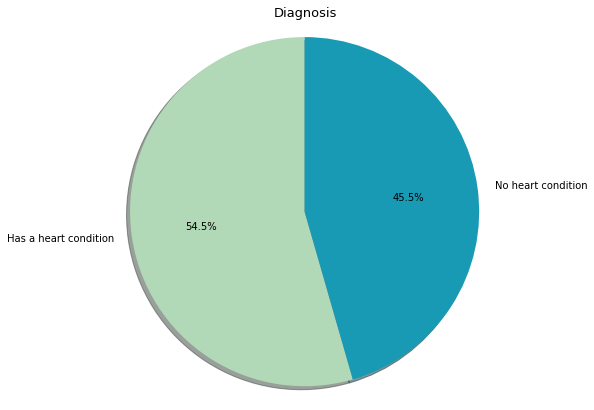

In [30]:
#Visualizing the Data - The first part of this project includes an analysis of the attributes and their relationship with the condition. 
#First let us visualize the categorical attributes
#How many patients in the given dataset are diagnosed with a heart disease?
y = ('Has a heart condition', 'No Heart Problems')
y_pos = np.arange(len(y))
x = (disease, no_disease)
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=('Has a heart condition', 'No heart condition'), shadow=True, colors=('#b1d8b7', '#189ab4'), autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Diagnosis', size=13)
plt.show()

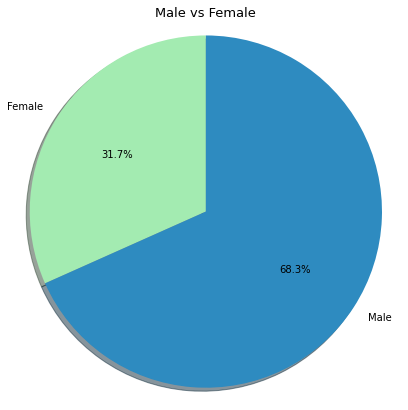

In [28]:
#What is the percentage of male and females effected?
countF = len(df[df.sex == 0])
countM = len(df[df.sex == 1])

y = ('Female', 'Male')
y_pos = np.arange(len(y))
x = (countF, countM)
sizes = [countF, countM]
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=('Female', 'Male'), autopct='%1.1f%%', shadow=True, colors=('#a3ebb1', '#2e8bc0'), startangle=90) 
ax2.axis('equal')
plt.title('Male vs Female', size=13)
plt.show()

In [ ]:
#TO_DO : Visualize and draw conclusions on each variables effect on heart diseases?
#Design pie charts and graphs to represent attribute relationship with the final product.

In [8]:
#We will split our data. 80% of our data will be train data and 20% of it will be test data.

y = df['condition']

df = df.drop('condition', axis = 1)

print("Shape of y: ", y.shape)

#drop dummy values
df = pd.get_dummies(df, drop_first=True)

#
x= df
print("Shape of x: ", x.shape)

Shape of y:  (303,)
Shape of x:  (303, 13)


In [9]:
#Creating the train and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 13)
Shape of x_test : (61, 13)
Shape of y_train : (242,)
Shape of y_test : (61,)


In [19]:
#Random Forest Classifier Algorithm
'''Why Random Forest?
-> This algorithm considers diffirent combinations of the attributes to analyze the target/ condition
-> Random Forest is also a quickly implementable supervised learning model
-> It has a better performance than the other models
-> In this specific project, we require to estimate the importance of a certain attribute when determining weather or not the person is going to has a heart condition; 
Random forest makes measuring the induvidual feature's relative importance easier'''

''' How does it work? 
-> Random forest will built multiple decision trees and merge them together to get a more accurate and stable prediction
-> In this scenario, we will be implementing random forest for a classification based problem
-> This model will also add aditional randomness to the model while growing the trees

The Algorithm works in four steps:

1) Select random samples from a given dataset.
2) Construct a decision tree for each sample and get a prediction result from each decision tree.
3) Perform a vote for each predicted result.
4) Select the prediction result with the most votes as the final prediction.'''

#import required modules
from sklearn.ensemble import RandomForestClassifier
#The sklearn. ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. 
#The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
#n-estimators hyperparameter is used to tell the classifier how many trees it can build before taking the average of each prediction
#more the trees - better the performance, but it slows down the computation
#max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data.
#the values assigned to the hyperparameters were decided based on review of other similar projects

model.fit(x_train, y_train)
#Train the model using the training sets x_train and y_train

#We can predict the class for new data instances using our finalized classification model in scikit-learn using the predict() function.
y_pred = model.predict(x_test)
#probability prediction - where given a new instance the model returns the probability for each outcome class as a value between 0 and 1. 
#This is done using model.predict_proba() to which we are passing are testing data x_test()
y_pred_prob = model.predict_proba(x_test)

Training Accuracy : 0.9338842975206612
Testing Accuracy : 0.8360655737704918


Classification Report Results: 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



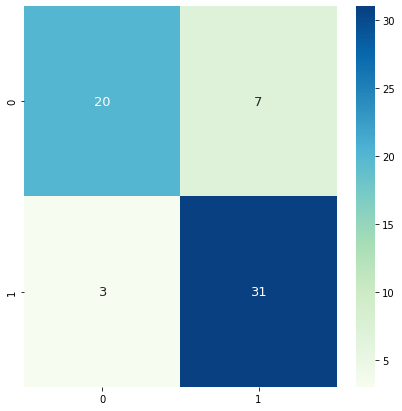

In [25]:
#evaluating the model's performance

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
print("\n")
#here we are first printing the models basic testing and training accuracy scores

from sklearn.metrics import confusion_matrix
#a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.
from sklearn.metrics import classification_report
#A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. 
#More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report.


# cofusion matrix - visualizing the results
matrix = confusion_matrix(y_test, y_pred)
#changing default figure size in matplotlib
plt.rcParams['figure.figsize'] = (7, 7)
#seaborn provides a way of Plotting rectangular data as a color-encoded matrix, using heatmap.
sns.heatmap(matrix, annot = True, annot_kws = {'size':13}, cmap = 'GnBu')
#annot: bool or rectangular dataset, if true -> write the data value in each cell
#annot_kws: when annot is true, -> proides a dict of key, value mappings
#cmap: matplotlib colormap name or object, or list of colors

# classification report - documenting the results
'''A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. 
More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report
-> Precision is the ability of a classifier not to label an instance positive that is actually negative. Precision = TP/(TP + FP) where, TP – True Positives, FP – False Positives
-> Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives(Recall = TP/(TP+FN))
-> The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 Score = 2*(Recall * Precision) / (Recall + Precision)'''
report = classification_report(y_test, y_pred)
print("Classification Report Results: \n", report)